In [221]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [222]:
# Load the data from the CSV file
data = pd.read_csv(r'D:\Kaggle\data\train.csv')

# Sort the data based on the DataFrame index
data = data.sort_index()

# Determine the split index
split_index = int(len(data) * 0.78)

# Create train and test sets based on the split index
trainDF = data.iloc[:split_index]
testDF = data.iloc[split_index:]

# Drop the 'user' column from the test set if it exists
if 'user' in testDF.columns:
    testDF = testDF.drop(columns=['user'])

# Verify the shapes of the resulting DataFrames
print(trainDF.shape, testDF.shape)


(686, 27) (194, 26)


In [223]:
trainDF.head()

user  press-0  release-0  press-1  release-1  press-2  release-2  press-3  \
0     2        0         88      233        352      328        448      496   
1     2        0         96      192        336      288        432      432   
2     2        0         95      215        335      288        484      435   
3     2        0         96      198        336      304        425      425   
4     2        0         71      183        327      279        399      375   

   release-3  press-4  ...  press-8  release-8  press-9  release-9  press-10  \
0        616      568  ...     1184       1304     1305       1450      1400   
1        520      472  ...     1160       1280     1256       1404      1383   
2        527      491  ...     1047       1191     1167       1280      1255   
3        544      520  ...     1113       1267     1268       1330      1352   
4        515      447  ...     1111       1255     1231       1375      1351   

   release-10  press-11  release-11  press-12  release-12  
0        1536      1489        1610      1705        1800  
1        1497      1424        1544      1664        1760  
2        1427      1303        1465      1548        1615  
3        1472      1353        1568      1664        1753  
4        1535      1463        1583      1703        1751  

[5 rows x 27 columns]

In [224]:
testDF.head()


press-0  release-0  press-1  release-1  press-2  release-2  press-3  \
686        0          7      118        195      387        482      572   
687        0          1       70        142      262        335      590   
688        0         55      210        279      351        415      648   
689        0         64      212        290      401        481      584   
690        0         62      191        262      317        378      527   

     release-3  press-4  release-4  ...  press-8  release-8  press-9  \
686        659      823        883  ...     1524       1627     1787   
687        686      766        848  ...     1496       1622     1849   
688        703      784        847  ...     1591       1655     1793   
689        656      752        812  ...     1480       1577     1644   
690        616      663        704  ...     1516       1625     1695   

     release-9  press-10  release-10  press-11  release-11  press-12  \
686       1867      1955        2083      2148        2203      2382   
687       1895      1990        2110      2132        2206      2296   
688       1866      2295        2377      2463        2543      2663   
689       1738      1920        2020      2080        2184      2256   
690       1778      1949        2039      2144        2251      2510   

     release-12  
686        2470  
687        2447  
688        2743  
689        2320  
690        2581  

[5 rows x 26 columns]

In [225]:
print('No. of rows in training dataset:',len(trainDF))
print('No. of users for which training data is present:',trainDF.user.nunique( ))

No. of rows in training dataset: 686
No. of users for which training data is present: 86


In [226]:
print('No. of rows in test dataset:',len(testDF))

No. of rows in test dataset: 194


In [227]:
trainDF1 = trainDF
for i in range(1,13):
    trainDF1['PPD-'+str(i)] = trainDF1['press-'+str(i)] - trainDF1['press-'+str(i-1)]
    trainDF1['RPD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i-1)]

for i in range(13):
    trainDF1['HD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i)]
    
testDF1 = testDF
for i in range(1,13):
    testDF1['PPD-'+str(i)] = testDF1['press-'+str(i)] - testDF1['press-'+str(i-1)]
    testDF1['RPD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i-1)]

for i in range(13):
    testDF1['HD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i)]

C:\Users\hp\AppData\Local\Temp\ipykernel_14872\3388370558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDF1['PPD-'+str(i)] = trainDF1['press-'+str(i)] - trainDF1['press-'+str(i-1)]
C:\Users\hp\AppData\Local\Temp\ipykernel_14872\3388370558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDF1['RPD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i-1)]
C:\Users\hp\AppData\Local\Temp\ipykernel_14872\3388370558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [228]:
trainDF1.head()

user  press-0  release-0  press-1  release-1  press-2  release-2  press-3  \
0     2        0         88      233        352      328        448      496   
1     2        0         96      192        336      288        432      432   
2     2        0         95      215        335      288        484      435   
3     2        0         96      198        336      304        425      425   
4     2        0         71      183        327      279        399      375   

   release-3  press-4  ...  HD-3  HD-4  HD-5  HD-6  HD-7  HD-8  HD-9  HD-10  \
0        616      568  ...   120   120    70    95    72   120   145    136   
1        520      472  ...    88    97   120    96   120   120   148    114   
2        527      491  ...    92    76    79    72    72   144   113    172   
3        544      520  ...   119    96    96    72   112   154    62    120   
4        515      447  ...   140   120    96    71    72   144   144    184   

   HD-11  HD-12  
0    121     95  
1    120     96  
2    162     67  
3    215     89  
4    120     48  

[5 rows x 64 columns]

In [229]:
trainDF1.columns

Index(['user', 'press-0', 'release-0', 'press-1', 'release-1', 'press-2',
       'release-2', 'press-3', 'release-3', 'press-4', 'release-4', 'press-5',
       'release-5', 'press-6', 'release-6', 'press-7', 'release-7', 'press-8',
       'release-8', 'press-9', 'release-9', 'press-10', 'release-10',
       'press-11', 'release-11', 'press-12', 'release-12', 'PPD-1', 'RPD-1',
       'PPD-2', 'RPD-2', 'PPD-3', 'RPD-3', 'PPD-4', 'RPD-4', 'PPD-5', 'RPD-5',
       'PPD-6', 'RPD-6', 'PPD-7', 'RPD-7', 'PPD-8', 'RPD-8', 'PPD-9', 'RPD-9',
       'PPD-10', 'RPD-10', 'PPD-11', 'RPD-11', 'PPD-12', 'RPD-12', 'HD-0',
       'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9',
       'HD-10', 'HD-11', 'HD-12'],
      dtype='object')

In [230]:
# Check stats of first 5 users i.e. 5 x 8 typing patterns
noOfUsers = 5
if noOfUsers == -1:
    trainDF2 = trainDF1
else:
    trainDF2 = trainDF1[:noOfUsers*8]

In [231]:
temp1 = pd.DataFrame({'Min':trainDF2.min(),'Max':trainDF2.max()})
temp1.head()


Min  Max
user         2    6
press-0      0    0
release-0    0  119
press-1      0  277
release-1   78  383

Text(0.5, 1.0, 'Scatterplot of PPD vs RPD')

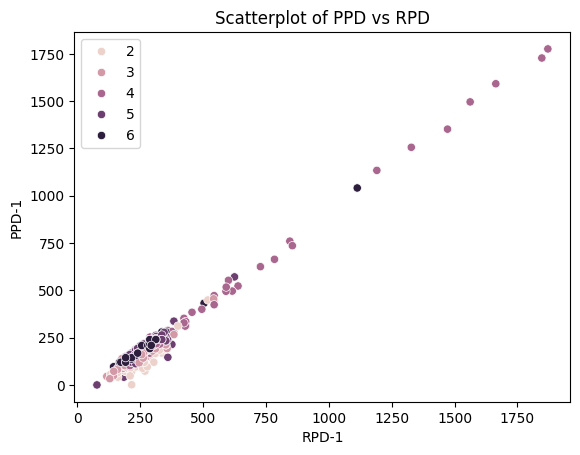

In [232]:
for i in range(1,13):
    ax = sns.scatterplot(x='RPD-'+str(i),y='PPD-'+str(i),hue='user',data=trainDF2)

# Small trick to avoid repeating legends: https://stackoverflow.com/a/36268401/5370202    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:noOfUsers], labels[:trainDF2.user.nunique()])
ax.set_title('Scatterplot of PPD vs RPD')

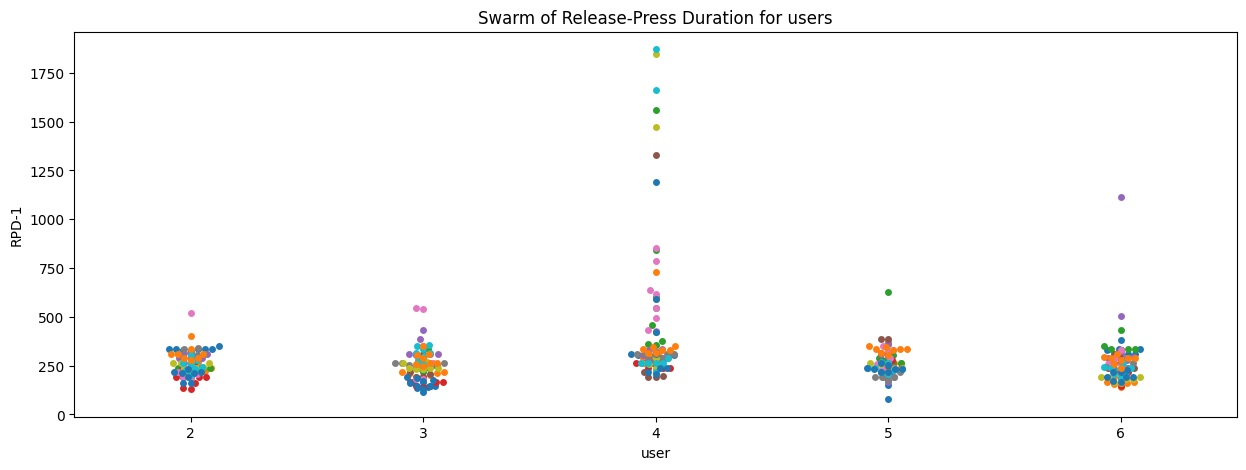

In [233]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='RPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Release-Press Duration for users')

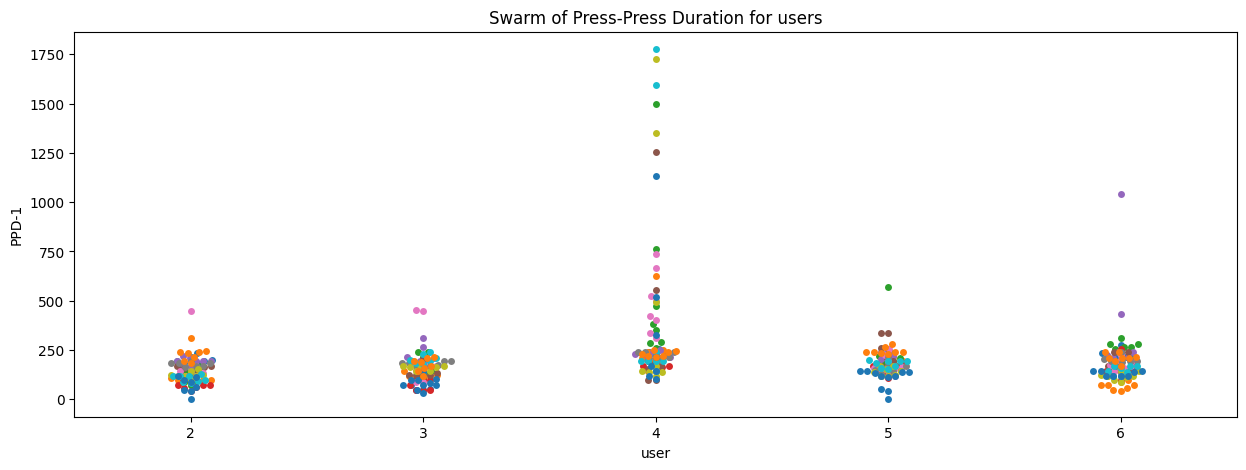

In [234]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='PPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Press-Press Duration for users')

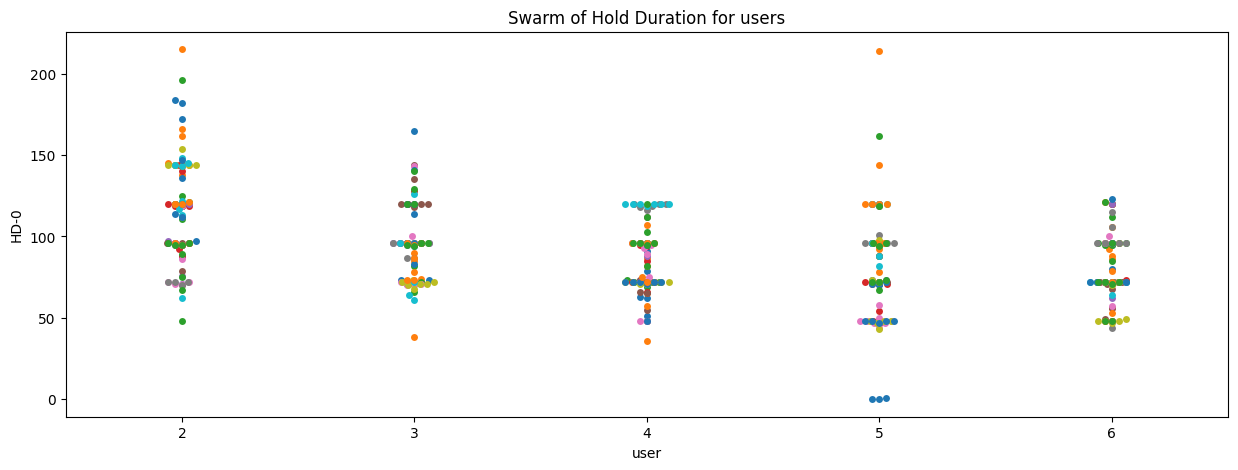

In [235]:
plt.figure(figsize=(15,5))
for i in range(13):
    sns.swarmplot(y='HD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Hold Duration for users')

In [236]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF2.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])


<Axes: xlabel='press-', ylabel='HD-'>

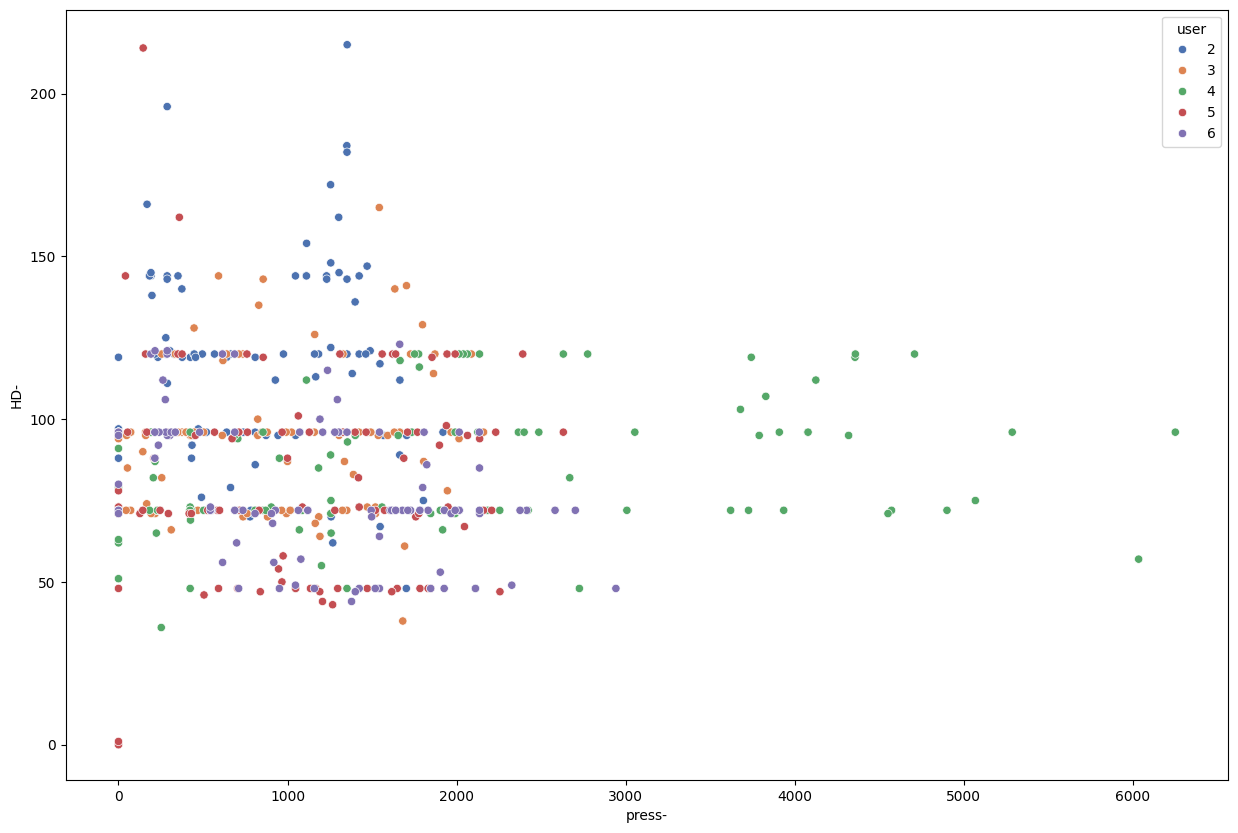

In [237]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='HD-',hue='user',data=trainDF_HD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

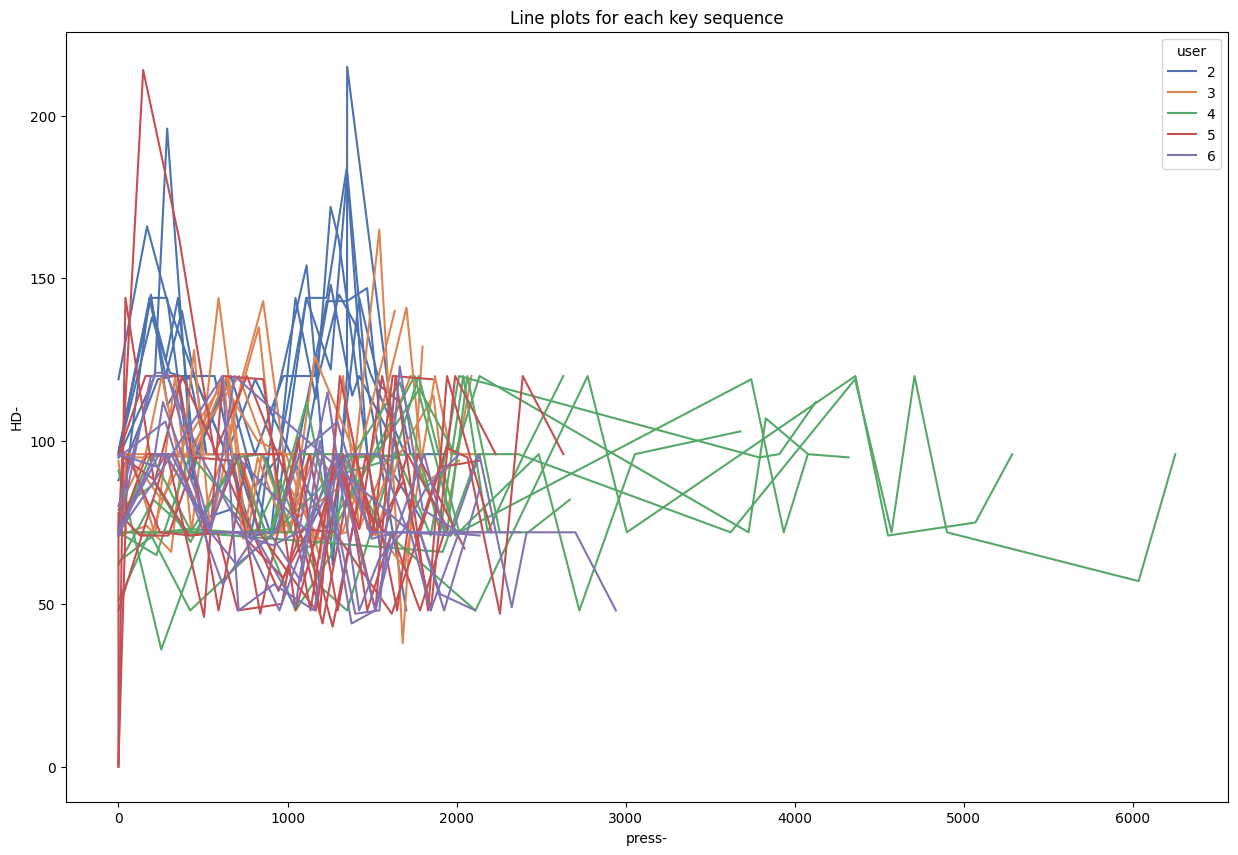

In [238]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='HD-',hue='user',units='id',estimator=None,data=trainDF_HD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [239]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = trainDF2.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_PPD_analysis

<Axes: xlabel='press-', ylabel='PPD-'>

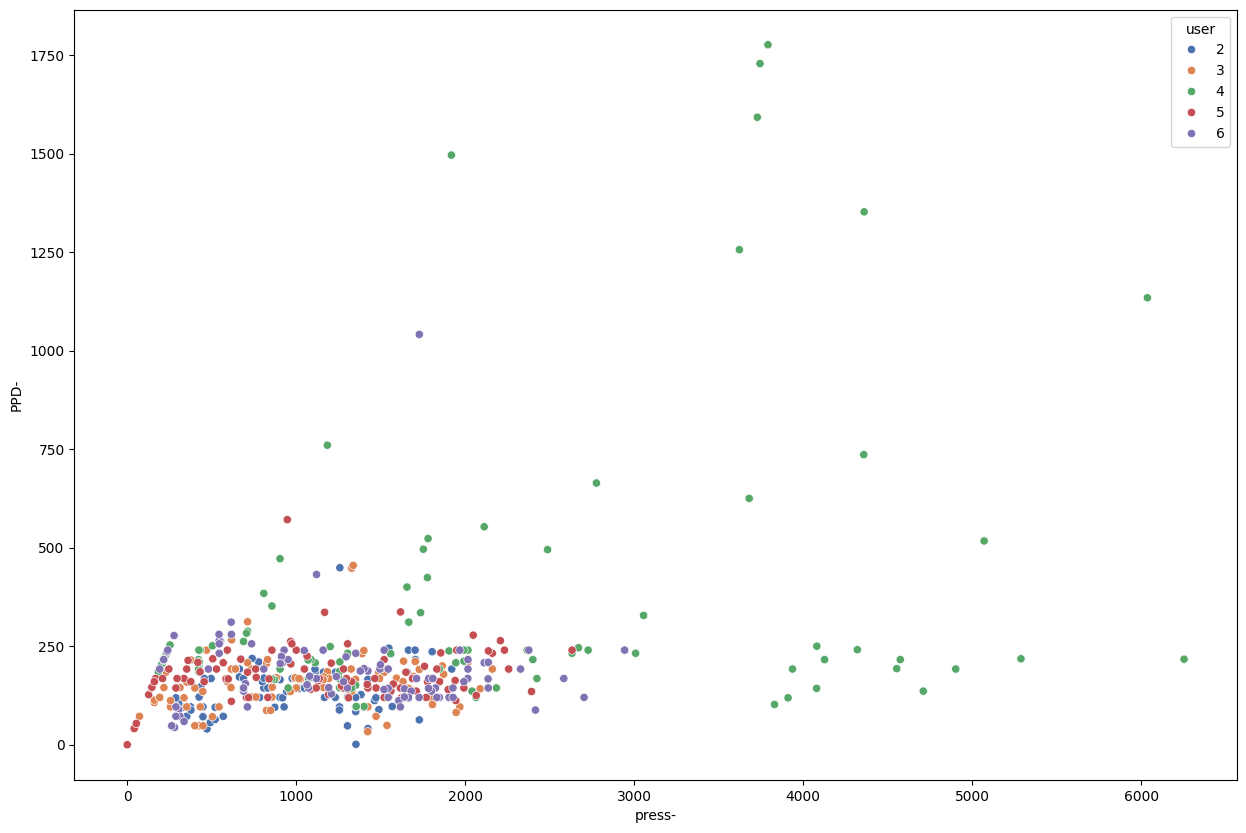

In [240]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='PPD-',hue='user',data=trainDF_PPD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

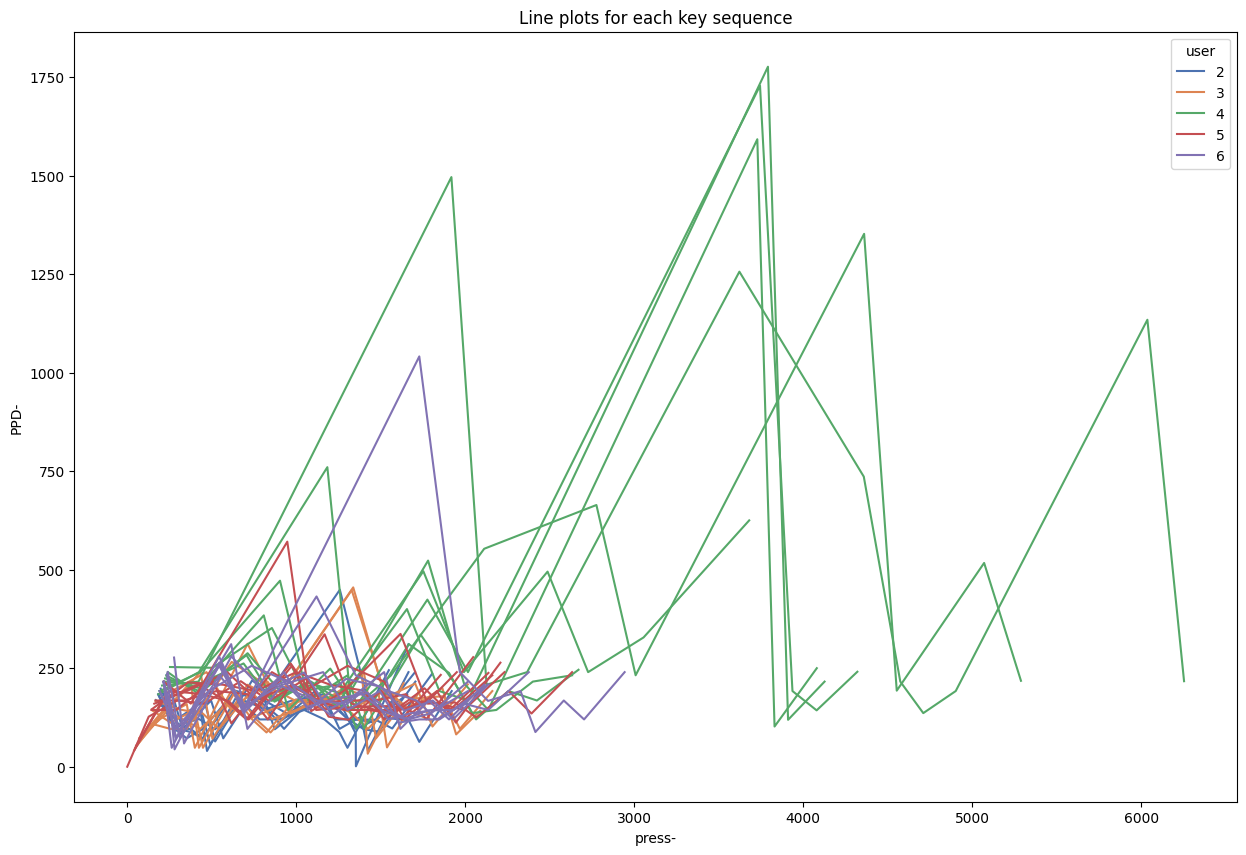

In [241]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='PPD-',hue='user',units='id',estimator=None,data=trainDF_PPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [242]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD_analysis = trainDF2.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_RPD_analysis

<Axes: xlabel='press-', ylabel='RPD-'>

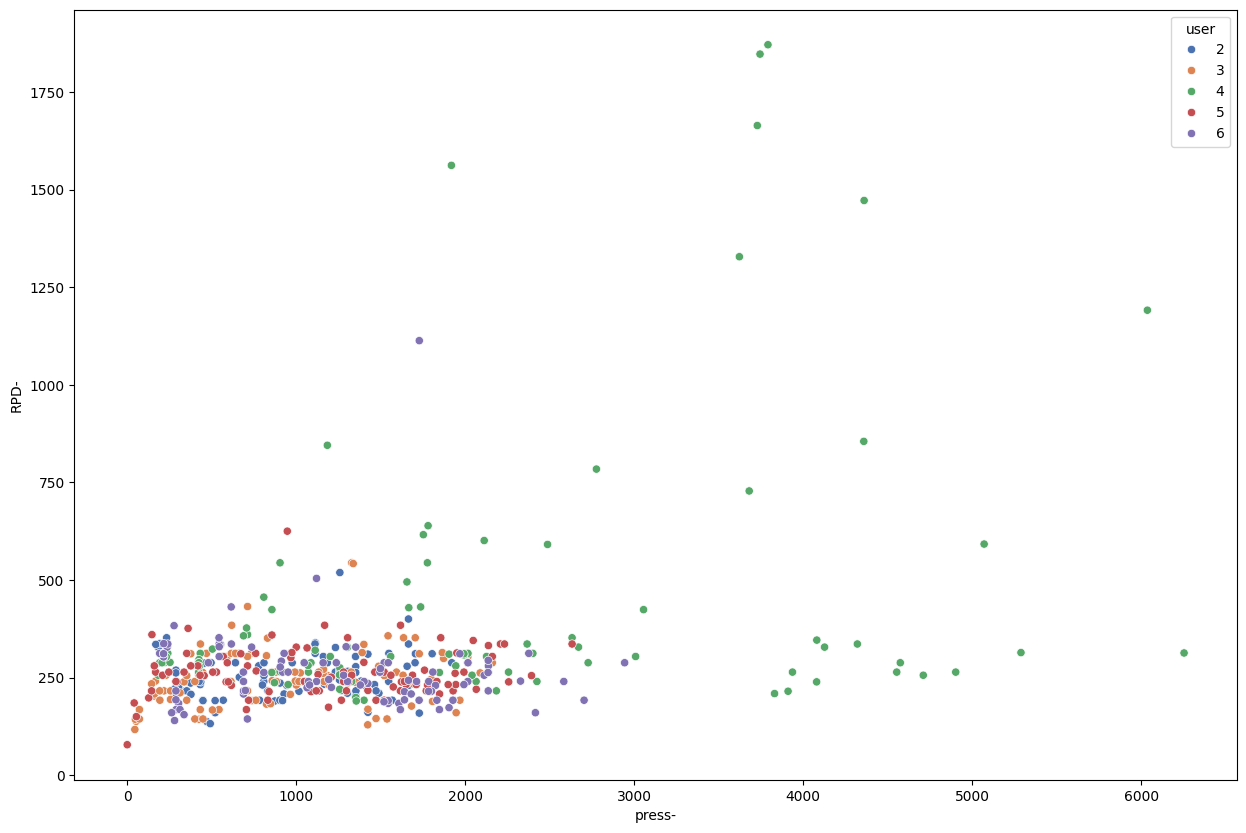

In [243]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='RPD-',hue='user',data=trainDF_RPD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

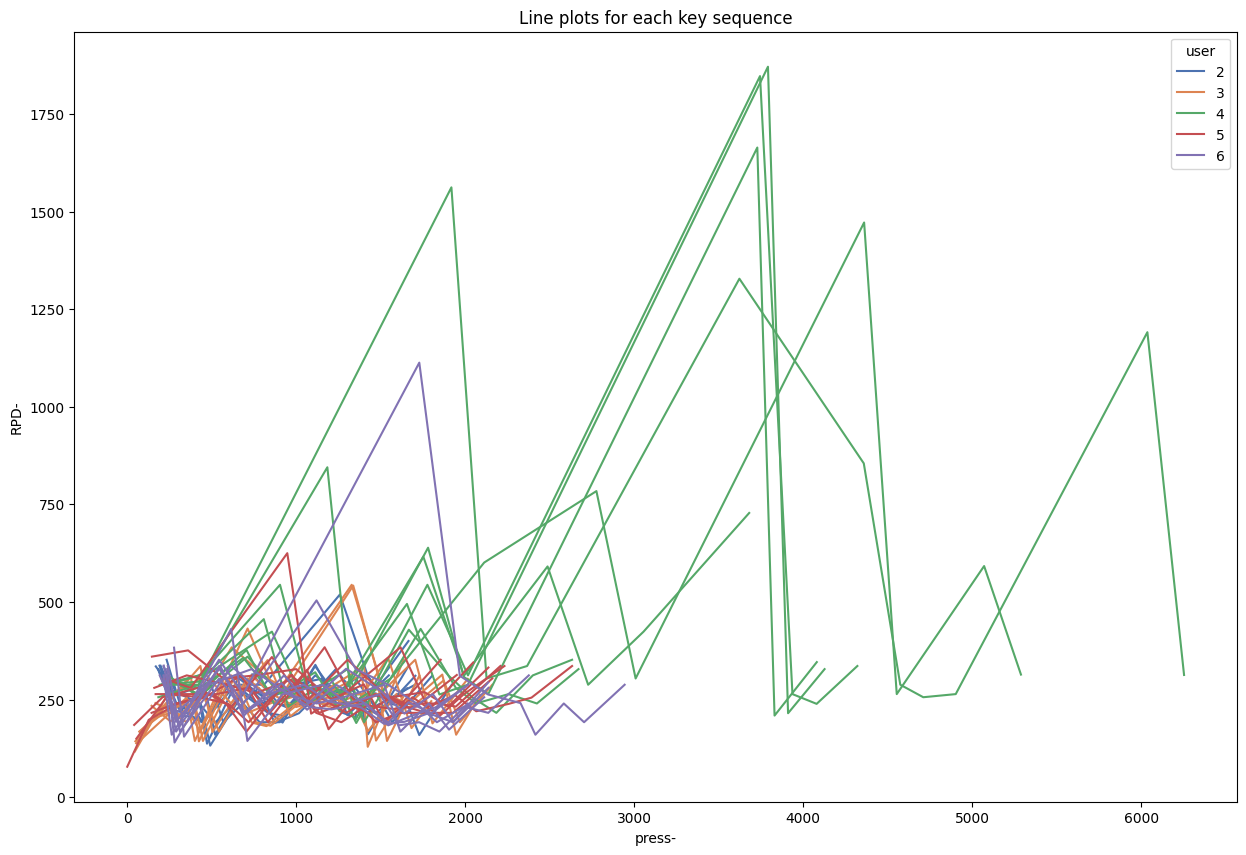

In [244]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='RPD-',hue='user',units='id',estimator=None,data=trainDF_RPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [245]:
## Training Data
drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF1.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = trainDF1.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD_analysis = trainDF1.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])


## Test Data
testDF_HD_analysis = testDF1.drop(columns=drop_cols_HD_analysis)
testDF_HD_analysis['id'] = testDF_HD_analysis.index
testDF_HD_analysis = pd.wide_to_long(testDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

testDF_PPD_analysis = testDF1.drop(columns=drop_cols_PPD_analysis)
testDF_PPD_analysis['id'] = testDF_PPD_analysis.index
testDF_PPD_analysis = pd.wide_to_long(testDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

testDF_RPD_analysis = testDF1.drop(columns=drop_cols_RPD_analysis)
testDF_RPD_analysis['id'] = testDF_RPD_analysis.index
testDF_RPD_analysis = pd.wide_to_long(testDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

In [246]:
## Join these individual tables together
testDFCombined = testDF_HD_analysis.join(testDF_RPD_analysis.drop(columns=['press-']),rsuffix='RPD_').join(testDF_PPD_analysis.drop(columns=['press-']),rsuffix='PPD_')

trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_')


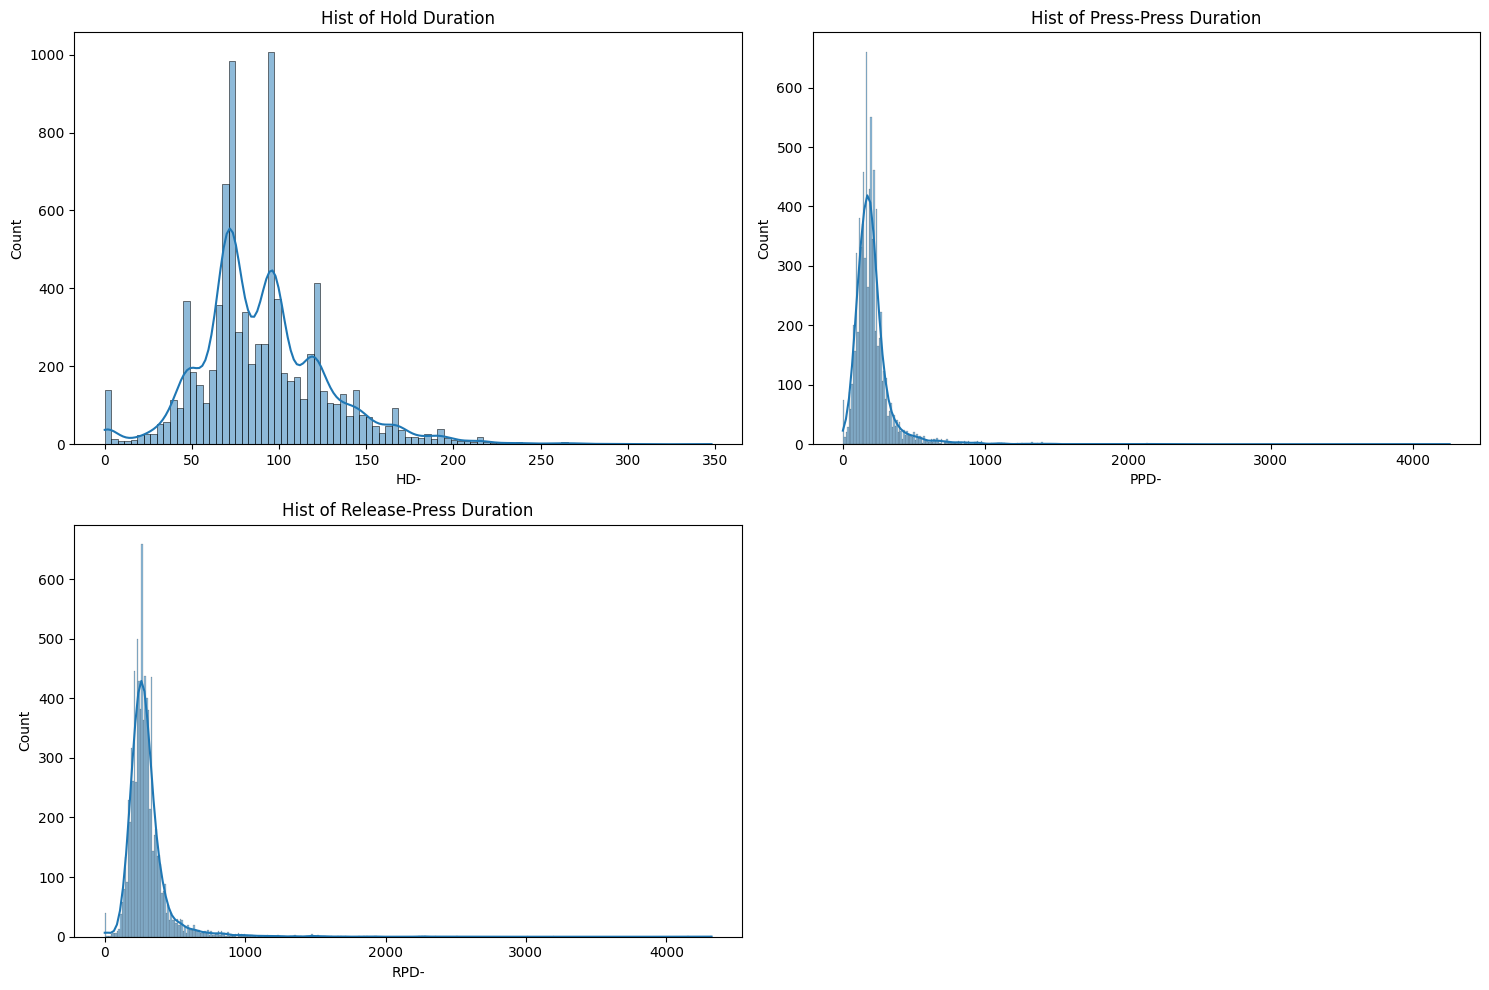

In [247]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(trainDFCombined['HD-'], kde=True).set_title('Hist of Hold Duration')

plt.subplot(2, 2, 2)
sns.histplot(trainDFCombined['PPD-'], kde=True).set_title('Hist of Press-Press Duration')

plt.subplot(2, 2, 3)
sns.histplot(trainDFCombined['RPD-'], kde=True).set_title('Hist of Release-Press Duration')

plt.tight_layout()
plt.show()

In [248]:
noOfBins = 10

## Training Data
HDMax = trainDFCombined['HD-'].max()
RPDMax = trainDFCombined['RPD-'].max()
PPDMax = trainDFCombined['PPD-'].max()
print('Max values in train are: HDMax:',HDMax,'RPDMax:',RPDMax,'PPDMax:',PPDMax)
labels = [i for i in range(noOfBins)]

trainDFCombined['HDEnc'],HDBins = pd.qcut(trainDFCombined['HD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['PPDEnc'],RPDBins = pd.qcut(trainDFCombined['PPD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RPDEnc'],PPDBins = pd.qcut(trainDFCombined['RPD-'],retbins=True,labels=labels,q=noOfBins)

trainDFCombined['HDEnc'] = trainDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(int)
trainDFCombined['PPDEnc'] = trainDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RPDEnc'] = trainDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)


## Test Data
HDMax = testDFCombined['HD-'].max()
RPDMax = testDFCombined['RPD-'].max()
PPDMax = testDFCombined['PPD-'].max()
print('Max values in test data are: HDMax:',HDMax,'RPDMax:',RPDMax,'PPDMax:',PPDMax)
labels = [i for i in range(noOfBins)]

testDFCombined['HDEnc'] = pd.cut(testDFCombined['HD-'],labels=labels,bins=HDBins)
testDFCombined['PPDEnc'] = pd.cut(testDFCombined['PPD-'],labels=labels,bins=RPDBins)
testDFCombined['RPDEnc'] = pd.cut(testDFCombined['RPD-'],labels=labels,bins=PPDBins)

testDFCombined['HDEnc'] = testDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['PPDEnc'] = testDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['RPDEnc'] = testDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)

Max values in train are: HDMax: 348 RPDMax: 4322.0 PPDMax: 4255.0
Max values in test data are: HDMax: 248 RPDMax: 1820.0 PPDMax: 1742.0


In [249]:
# trainDFCombined

user  press-  HD-    RPD-    PPD-  HDEnc  PPDEnc  RPDEnc
id  key_no                                                          
0   0          2       0   88     NaN     NaN      5    -1.0    -1.0
    1          2     233  119   352.0   233.0      7     7.0     7.0
    2          2     328  120   215.0    95.0      8     0.0     2.0
    3          2     496  120   288.0   168.0      8     4.0     5.0
    4          2     568  120   192.0    72.0      8     0.0     1.0
    5          2     778   70   280.0   210.0      2     6.0     5.0
    6          2     873   95   190.0    95.0      5     0.0     1.0
    7          2    1016   72   215.0   143.0      2     2.0     2.0
    8          2    1184  120   288.0   168.0      8     4.0     5.0
    9          2    1305  145   266.0   121.0      9     1.0     4.0
    10         2    1400  136   231.0    95.0      8     0.0     2.0
    11         2    1489  121   210.0    89.0      8     0.0     1.0
    12         2    1705   95   311.0   216.0      5     6.0     6.0
1   0          2       0   96     NaN     NaN      5    -1.0    -1.0
    1          2     192  144   336.0   192.0      9     5.0     7.0
    2          2     288  144   240.0    96.0      9     1.0     3.0
    3          2     432   88   232.0   144.0      5     2.0     2.0
    4          2     472   97   137.0    40.0      6     0.0     0.0
    5          2     664  120   312.0   192.0      8     5.0     6.0
    6          2     808   96   240.0   144.0      5     2.0     3.0
    7          2     976  120   288.0   168.0      8     4.0     5.0
    8          2    1160  120   304.0   184.0      8     4.0     6.0
    9          2    1256  148   244.0    96.0      9     1.0     3.0
    10         2    1383  114   241.0   127.0      7     2.0     3.0
    11         2    1424  120   161.0    41.0      8     0.0     0.0
    12         2    1664   96   336.0   240.0      5     7.0     7.0
2   0          2       0   95     NaN     NaN      5    -1.0    -1.0
    1          2     215  120   335.0   215.0      8     6.0     7.0
    2          2     288  196   269.0    73.0      9     0.0     4.0
    3          2     435   92   239.0   147.0      5     3.0     3.0
    4          2     491   76   132.0    56.0      4     0.0     0.0
    5          2     663   79   251.0   172.0      4     4.0     3.0
    6          2     783   72   192.0   120.0      2     1.0     1.0
    7          2     903   72   192.0   120.0      2     1.0     1.0
    8          2    1047  144   288.0   144.0      9     2.0     5.0
    9          2    1167  113   233.0   120.0      7     1.0     2.0
    10         2    1255  172   260.0    88.0      9     0.0     4.0
    11         2    1303  162   210.0    48.0      9     0.0     1.0
    12         2    1548   67   312.0   245.0      2     7.0     6.0
3   0          2       0   96     NaN     NaN      5    -1.0    -1.0
    1          2     198  138   336.0   198.0      9     5.0     7.0
    2          2     304  121   227.0   106.0      8     1.0     2.0
    3          2     425  119   240.0   121.0      7     1.0     3.0
    4          2     520   96   191.0    95.0      5     0.0     1.0
    5          2     688   96   264.0   168.0      5     4.0     4.0
    6          2     832   72   216.0   144.0      2     2.0     2.0
    7          2     928  112   208.0    96.0      7     1.0     1.0
    8          2    1113  154   339.0   185.0      9     5.0     7.0
    9          2    1268   62   217.0   155.0      1     3.0     2.0
    10         2    1352  120   204.0    84.0      8     0.0     1.0
    11         2    1353  215   216.0     1.0      9     0.0     2.0
    12         2    1664   89   400.0   311.0      5     8.0     8.0
4   0          2       0   71     NaN     NaN      2    -1.0    -1.0
    1          2     183  144   327.0   183.0      9     4.0     7.0
    2          2     279  120   216.0    96.0      8     1.0     2.0
    3          2     375  140   236.0    96.0      9     1.0     3.0
    4     

In [250]:
testDFCombined

press-  HD-    RPD-    PPD-  HDEnc  PPDEnc  RPDEnc
id  key_no                                                           
686 0                   0    7     NaN     NaN    0.0    -1.0    -1.0
    1                 118   77   195.0   118.0    4.0     1.0     1.0
    2                 387   95   364.0   269.0    5.0     8.0     8.0
    3                 572   87   272.0   185.0    4.0     5.0     5.0
    4                 823   60   311.0   251.0    1.0     7.0     6.0
    5                1034  121   332.0   211.0    8.0     6.0     7.0
    6                1188  128   282.0   154.0    8.0     3.0     5.0
    7                1420  112   344.0   232.0    7.0     7.0     7.0
    8                1524  103   207.0   104.0    7.0     1.0     1.0
    9                1787   80   343.0   263.0    4.0     8.0     7.0
    10               1955  128   296.0   168.0    8.0     4.0     6.0
    11               2148   55   248.0   193.0    1.0     5.0     3.0
    12               2382   88   322.0   234.0    5.0     7.0     7.0
687 0                   0    1     NaN     NaN    0.0    -1.0    -1.0
    1                  70   72   142.0    70.0    2.0     0.0     0.0
    2                 262   73   265.0   192.0    3.0     5.0     4.0
    3                 590   96   424.0   328.0    5.0     9.0     9.0
    4                 766   82   258.0   176.0    4.0     4.0     4.0
    5                 958  136   328.0   192.0    8.0     5.0     7.0
    6                1057   96   195.0    99.0    5.0     1.0     1.0
    7                1355  141   439.0   298.0    9.0     8.0     9.0
    8                1496  126   267.0   141.0    8.0     2.0     4.0
    9                1849   46   399.0   353.0    0.0     9.0     8.0
    10               1990  120   261.0   141.0    8.0     2.0     4.0
    11               2132   74   216.0   142.0    3.0     2.0     2.0
    12               2296  151   315.0   164.0    9.0     3.0     6.0
688 0                   0   55     NaN     NaN    1.0    -1.0    -1.0
    1                 210   69   279.0   210.0    2.0     6.0     5.0
    2                 351   64   205.0   141.0    1.0     2.0     1.0
    3                 648   55   352.0   297.0    1.0     8.0     7.0
    4                 784   63   199.0   136.0    1.0     2.0     1.0
    5                 985   61   262.0   201.0    1.0     6.0     4.0
    6                1220   60   295.0   235.0    1.0     7.0     6.0
    7                1410   87   277.0   190.0    4.0     5.0     5.0
    8                1591   64   245.0   181.0    1.0     4.0     3.0
    9                1793   73   275.0   202.0    3.0     6.0     5.0
    10               2295   82   584.0   502.0    4.0     9.0     9.0
    11               2463   80   248.0   168.0    4.0     4.0     3.0
    12               2663   80   280.0   200.0    4.0     5.0     5.0
689 0                   0   64     NaN     NaN    1.0    -1.0    -1.0
    1                 212   78   290.0   212.0    4.0     6.0     5.0
    2                 401   80   269.0   189.0    4.0     5.0     4.0
    3                 584   72   255.0   183.0    2.0     4.0     3.0
    4                 752   60   228.0   168.0    1.0     4.0     2.0
    5                 947   53   248.0   195.0    1.0     5.0     3.0
    6                1130   63   246.0   183.0    1.0     4.0     3.0
    7                1315   69   254.0   185.0    2.0     5.0     3.0
    8                1480   97   262.0   165.0    6.0     3.0     4.0
    9                1644   94   258.0   164.0    5.0     3.0     4.0
    10               1920  100   376.0   276.0    6.0     8.0     8.0
    11               2080  104   264.0   160.0    7.0     3.0     4.0
    12               2256   64   240.0   176.0    1.0     4.0     3.0
690 0                   0   62     NaN     NaN    1.0    -1.0    -1.0
    1                 191   71   262.0   191.0    2.0     5.0     4.0
    2                 317   61   187.0   126.0    1.0     2.0     1.0
    3                 527   8

In [251]:
## Lower limit values of bins created
HDBins, RPDBins, PPDBins, 'No. of buckets: '+str(len(HDBins)-1)

(array([  0.,  48.,  66.,  72.,  74.,  87.,  96., 100., 119., 137., 348.]),
 array([   0. ,   95. ,  121. ,  144. ,  166. ,  184. ,  200. ,  219. ,
         254. ,  316.9, 4255. ]),
 array([   0. ,  182. ,  211. ,  234. ,  256. ,  271. ,  292. ,  316. ,
         352. ,  422.9, 4322. ]),
 'No. of buckets: 10')

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Roaming\Python\Pytho

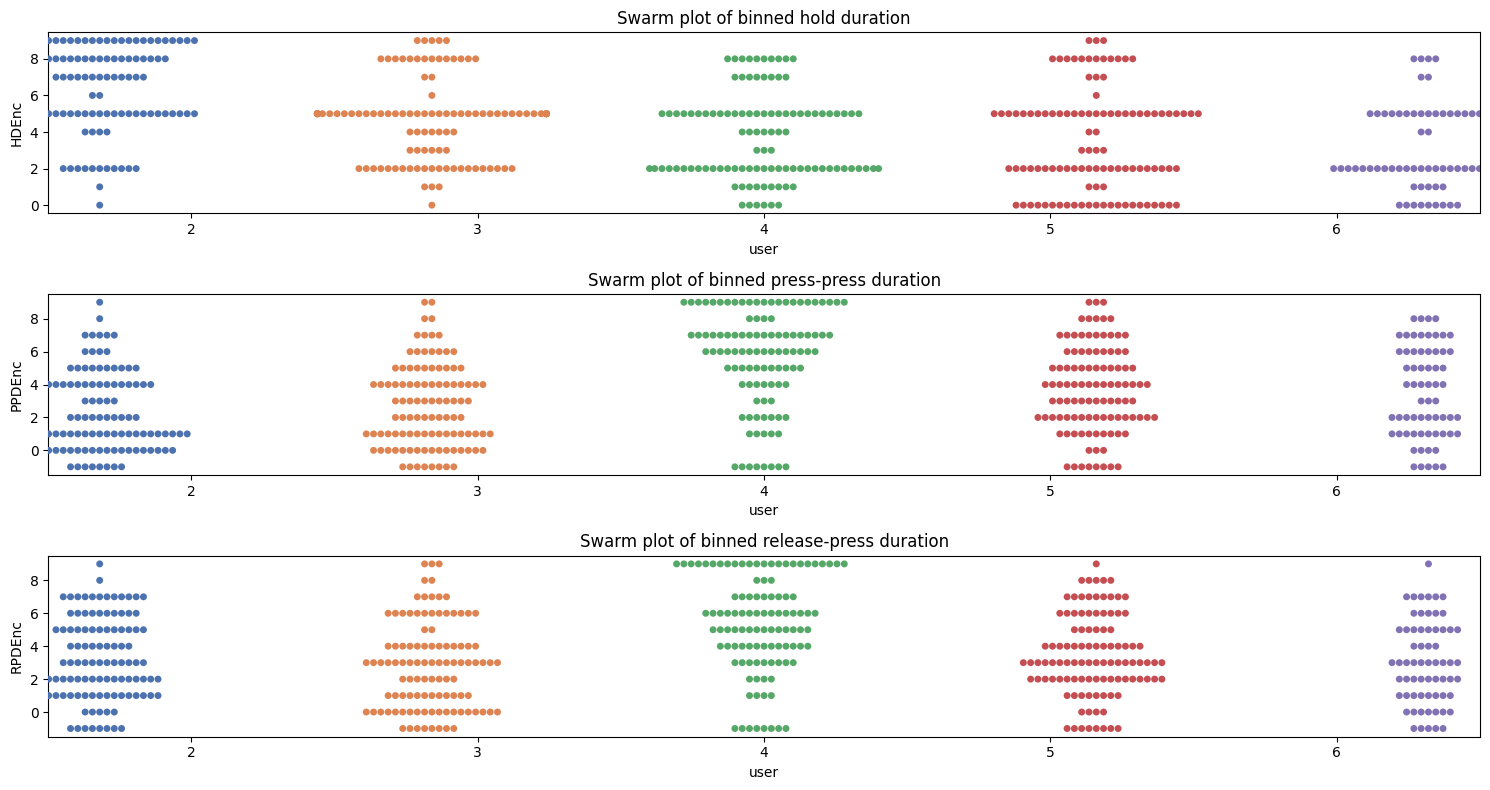

In [252]:
plt.figure(figsize=(15, 8))
noOfUsers = 5

plt.subplot(3, 1, 1)
sns.swarmplot(y='HDEnc', x='user', hue='user', data=trainDFCombined[:8*12*noOfUsers], palette='deep', dodge=True).set_title('Swarm plot of binned hold duration')
plt.legend([],[], frameon=False)  # Hide legend

plt.subplot(3, 1, 2)
sns.swarmplot(y='PPDEnc', x='user', hue='user', data=trainDFCombined[:8*12*noOfUsers], palette='deep', dodge=True).set_title('Swarm plot of binned press-press duration')
plt.legend([],[], frameon=False)  # Hide legend

plt.subplot(3, 1, 3)
sns.swarmplot(y='RPDEnc', x='user', hue='user', data=trainDFCombined[:8*12*noOfUsers], palette='deep', dodge=True).set_title('Swarm plot of binned release-press duration')
plt.legend([],[], frameon=False)  # Hide legend

plt.tight_layout()
plt.show()

In [253]:
trainDFCombinedHDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('user')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('user')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('user')['RPD'].apply(np.array)

trainDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

trainDF_UserProps = pd.DataFrame(trainDF_UserProps.HD.tolist(),index = trainDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_UserProps.PPD.tolist(),index = trainDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_UserProps.RPD.tolist(),index = trainDF_UserProps.index).add_prefix('RPD_')
)

# Average bin keystrokes for each of the 110 users
trainDF_UserProps

HD_0   HD_1      HD_2      HD_3   HD_4      HD_5      HD_6  \
user                                                                   
2     5.000000  8.625  8.250000  7.125000  6.125  5.125000  3.625000   
3     3.375000  3.875  3.250000  5.750000  4.250  7.625000  4.125000   
4     2.250000  2.500  2.250000  2.875000  3.750  3.125000  2.875000   
5     1.875000  5.875  5.500000  1.750000  4.750  3.500000  0.250000   
6     3.000000  6.000  6.000000  3.125000  2.750  1.500000  2.875000   
7     2.000000  1.875  1.750000  2.125000  2.375  4.875000  2.625000   
8     1.875000  1.875  2.375000  2.125000  1.625  2.375000  1.750000   
9     3.375000  7.250  5.875000  6.125000  2.500  1.625000  5.750000   
10    1.625000  2.000  1.125000  4.625000  7.875  6.750000  2.125000   
11    6.500000  6.000  2.125000  5.125000  5.750  3.000000  2.250000   
12    2.375000  4.625  4.250000  3.500000  3.125  3.625000  4.250000   
13    6.000000  9.000  7.750000  7.750000  6.750  4.875000  5.500000   
14    3.750000  5.375  4.125000  3.500000  6.250  4.750000  6.625000   
15    0.750000  0.625  1.875000  3.875000  2.375  2.125000  0.750000   
16    2.000000  5.625  6.250000  2.500000  4.625  6.875000  5.625000   
17    4.750000  5.375  3.250000  8.625000  7.250  7.125000  3.375000   
18    2.875000  3.000  2.125000  5.500000  4.375  6.250000  1.375000   
19    1.000000  2.250  5.375000  5.125000  5.125  4.750000  5.375000   
20    3.750000  4.500  5.125000  8.500000  7.875  4.750000  3.500000   
21    5.625000  2.375  3.750000  3.375000  4.375  3.125000  2.000000   
22    0.625000  1.125  1.125000  5.250000  5.125  3.750000  0.500000   
23    5.500000  6.125  4.875000  4.875000  4.000  6.000000  5.000000   
24    2.250000  7.125  6.750000  4.375000  7.500  4.875000  3.500000   
25    4.250000  8.375  8.250000  7.875000  8.250  7.625000  8.625000   
26    7.000000  6.375  6.750000  6.125000  4.625  3.375000  4.875000   
27    4.500000  7.875  6.000000  7.625000  2.875  6.625000  4.875000   
28    1.250000  4.625  0.625000  8.875000  6.500  6.625000  6.125000   
29    4.125000  6.375  2.375000  7.750000  6.000  6.500000  8.000000   
30    2.250000  3.250  1.625000  2.875000  3.375  3.625000  3.375000   
31    1.000000  3.250  2.250000  5.500000  3.625  3.750000  4.375000   
32    2.125000  2.500  4.125000  2.125000  4.125  2.375000  3.750000   
33    0.500000  1.250  3.125000  2.750000  1.250  5.625000  3.875000   
34    6.875000  8.750  8.750000  9.000000  8.375  8.000000  9.000000   
35    5.125000  4.250  6.125000  8.625000  5.125  6.000000  6.500000   
36    0.750000  2.375  2.125000  1.875000  5.125  2.375000  4.125000   
37    2.625000  2.250  2.500000  3.625000  3.375  3.875000  6.125000   
38    2.250000  2.000  2.625000  3.500000  1.250  2.125000  3.750000   
39    3.250000  1.875  3.000000  0.625000  2.625  3.250000  1.625000   
40    3.250000  2.500  2.375000  4.000000  5.000  2.250000  1.750000   
41    1.750000  3.250  2.250000  2.625000  5.750  5.875000  4.125000   
42    1.625000  2.125  2.125000  1.500000  2.500  3.000000  7.000000   
43    5.125000  5.375  7.000000  5.125000  6.125  5.750000  6.750000   
44    4.125000  3.500  4.625000  2.375000  1.375  4.000000  2.500000   
45    2.250000  5.250  2.250000  2.125000  1.000  0.625000  5.375000   
46    1.750000  1.250  1.750000  1.875000  0.750  2.500000  1.125000   
47    0.375000  1.375  1.375000  0.750000  4.000  5.000000  2.125000   
48    1.875000  4.750  1.625000  8.500000  5.250  2.500000  1.750000   
49    2.500000  1.250  3.875000  5.500000  4.250  3.625000  3.750000   
50    1.000000  1.875  2.125000  4.125000  3.250  3.250000  4.125000   
51    5.125000  4.125  4.500000  7.500000  5.250  6.250000  4.500000   
52    2.625000  7.000  8.875000  1.750000  3.000  3.250000  4.000000   
53    6.375000  9.000  5.750000  7.375000  5.750  2.625000  2.000000   
54    1.250000  6.875  4.750000  5.375000  5.125  3.500000  2.625000   
55    1.375000  6.500  5.375000  3.125000  2.500  

In [254]:
trainDFCombinedHDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('id')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('id')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('id')['RPD'].apply(np.array)

testDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

testDF_UserProps = pd.DataFrame(testDF_UserProps.HD.tolist(),index = testDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_UserProps.PPD.tolist(),index = testDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_UserProps.RPD.tolist(),index = testDF_UserProps.index).add_prefix('RPD_')
)

# Bin allocation 
testDF_UserProps

HD_0  HD_1  HD_2  HD_3  HD_4  HD_5  HD_6  HD_7  HD_8  HD_9  ...  RPD_3  \
id                                                               ...          
686   0.0   4.0   5.0   4.0   1.0   8.0   8.0   7.0   7.0   4.0  ...    5.0   
687   0.0   2.0   3.0   5.0   4.0   8.0   5.0   9.0   8.0   0.0  ...    9.0   
688   1.0   2.0   1.0   1.0   1.0   1.0   1.0   4.0   1.0   3.0  ...    7.0   
689   1.0   4.0   4.0   2.0   1.0   1.0   1.0   2.0   6.0   5.0  ...    3.0   
690   1.0   2.0   1.0   5.0   0.0   1.0   1.0   2.0   7.0   4.0  ...    6.0   
691   4.0   7.0   4.0   7.0   4.0   4.0   1.0   2.0   7.0   7.0  ...    6.0   
692   2.0   0.0   1.0   5.0   1.0   2.0   2.0   1.0   8.0   1.0  ...    9.0   
693   1.0   3.0   1.0   7.0   1.0   2.0   1.0   2.0   4.0   7.0  ...    7.0   
694   2.0   5.0   2.0   6.0   7.0   7.0   1.0   8.0   8.0   7.0  ...    5.0   
695   2.0   6.0   1.0   5.0   0.0   0.0   0.0   6.0   4.0   6.0  ...    4.0   
696   5.0   7.0   1.0   4.0   8.0   7.0   5.0   4.0   5.0   6.0  ...    2.0   
697   9.0   5.0   8.0   7.0   9.0   8.0   5.0   6.0   8.0   9.0  ...    7.0   
698   7.0   4.0   6.0   5.0   8.0   7.0   7.0   7.0   8.0   9.0  ...    6.0   
699   8.0   4.0   4.0   4.0   8.0   9.0   5.0   8.0   3.0   9.0  ...    6.0   
700   7.0   7.0   2.0   7.0   9.0   4.0   7.0   4.0   8.0   9.0  ...    7.0   
701   8.0   7.0   4.0   5.0   8.0   7.0   7.0   5.0   7.0   9.0  ...    4.0   
702   1.0   5.0   7.0   7.0   1.0   6.0   7.0   7.0   7.0   8.0  ...    6.0   
703   8.0   7.0   4.0   6.0   7.0   8.0   7.0   4.0   7.0   4.0  ...    5.0   
704   3.0   9.0   1.0   8.0   2.0   8.0   4.0   7.0   9.0   8.0  ...    1.0   
705   1.0   9.0   8.0   8.0   1.0   8.0   4.0   7.0   9.0   8.0  ...    5.0   
706   0.0   9.0   7.0   9.0   5.0   7.0   7.0   8.0   4.0   9.0  ...    7.0   
707   0.0   6.0   8.0   9.0   3.0   7.0   5.0   6.0   7.0   9.0  ...    6.0   
708   0.0   4.0   8.0   9.0   0.0   7.0   8.0   6.0   5.0   9.0  ...    6.0   
709  -1.0   0.0   7.0   8.0   4.0   9.0   2.0   6.0   7.0   9.0  ...    6.0   
710   0.0   9.0   7.0   9.0   4.0   9.0   5.0   5.0   5.0   8.0  ...    6.0   
711   0.0   6.0   7.0   8.0   4.0   8.0   5.0   5.0   7.0   9.0  ...    4.0   
712   0.0   1.0   1.0   0.0   2.0   0.0   1.0   7.0   0.0   7.0  ...    9.0   
713   2.0   0.0   5.0   0.0   2.0   0.0   0.0   7.0   1.0   7.0  ...    8.0   
714   1.0   0.0   1.0   1.0   2.0   0.0   0.0   7.0   1.0   2.0  ...    9.0   
715   0.0   0.0   0.0   1.0   0.0   1.0   0.0   4.0   1.0   4.0  ...    6.0   
716   1.0   0.0   0.0   1.0   3.0   0.0   0.0   7.0   1.0   4.0  ...    7.0   
717   0.0   1.0   0.0   1.0   4.0   3.0   1.0   7.0   2.0   7.0  ...    8.0   
718   1.0   1.0   0.0   1.0   5.0   4.0   1.0   7.0   4.0   4.0  ...    7.0   
719   1.0   1.0   0.0   1.0   3.0   1.0   1.0   7.0   0.0   0.0  ...    8.0   
720   4.0   4.0   3.0   2.0   1.0   4.0   6.0   4.0   2.0   1.0  ...    8.0   
721   1.0   4.0   1.0   4.0   3.0   2.0   5.0   0.0   0.0   1.0  ...    8.0   
722   2.0   4.0   4.0   6.0   1.0   3.0   7.0   0.0   2.0   1.0  ...    8.0   
723   5.0   4.0   1.0   4.0   1.0   1.0   7.0   0.0   2.0   3.0  ...    8.0   
724   6.0   5.0   3.0   1.0   1.0   1.0   7.0   1.0   1.0   1.0  ...    8.0   
725   3.0   5.0   0.0   3.0   0.0   1.0   4.0   1.0   0.0   1.0  ...    7.0   
726   1.0   5.0   4.0   1.0   2.0   1.0   2.0   1.0   0.0   1.0  ...    7.0   
727   5.0   4.0   4.0   1.0   2.0   0.0   2.0   1.0   0.0   0.0  ...    7.0   
728   2.0   7.0   8.0   0.0   4.0   8.0   9.0   9.0   5.0   9.0  ...    0.0   
729   8.0   4.0   4.0   2.0   2.0   7.0   7.0   9.0   1.0   2.0  ...    0.0   
730   5.0   2.0   4.0   1.0   4.0   4.0   9.0   9.0   4.0   4.0  ...    0.0   
731   5.0   4.0   7.0   0.0   0.0   8.0   7.0   8.0   5.0   4.0  ...    0.0   
732   4.0   2.0   4.0   2.0   8.0   5.0   7.0   7.0   1.0   5.0  ...    0.0   
733   0.0   1.0   5.0   9.0   0.0   5.0   7.0   9.0   5.0   6.0  ...    7.0   
734   2.0   4.0   4.0   5.0   7.0   7.0   7.0   5.0   6

In [255]:
trainDF_HDTemp = trainDFCombined.reset_index().groupby(['user','id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['RPDEnc'].apply(np.array)

trainDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

trainDF_User_AllSampleProps = pd.DataFrame(trainDF_User_AllSampleProps.HD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_User_AllSampleProps.PPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_User_AllSampleProps.RPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('RPD_')
).reset_index().set_index('user').drop(columns=['id'])

trainDF_User_AllSampleProps

HD_0  HD_1  HD_2  HD_3  HD_4  HD_5  HD_6  HD_7  HD_8  HD_9  ...  RPD_3  \
user                                                              ...          
2        5     7     8     8     8     2     5     2     8     9  ...    5.0   
2        5     9     9     5     6     8     5     8     8     9  ...    2.0   
2        5     8     9     5     4     4     2     2     9     7  ...    3.0   
2        5     9     8     7     5     5     2     7     9     1  ...    3.0   
2        2     9     8     9     8     5     2     2     9     9  ...    3.0   
2        5     9     8     9     5     7     4     5     9     8  ...    2.0   
2        6     9     7     7     8     5     7     2     9     7  ...    1.0   
2        7     9     9     7     5     5     2     5     9     9  ...    5.0   
3        2     3     1     8     2     8     9     4     2     2  ...    4.0   
3        5     5     2     8     2     9     5     5     5     1  ...    3.0   
3        3     4     5     8     5     7     6     5     2     5  ...    2.0   
3        2     5     5     5     5     8     2     5     2     5  ...    6.0   
3        2     2     2     5     5     8     5     5     3     1  ...    3.0   
3        5     5     5     5     5     5     2     4     2     5  ...    7.0   
3        3     5     4     5     5     8     2     5     2     8  ...    3.0   
3        5     2     2     2     5     8     2     5     2     5  ...    6.0   
4        2     5     2     2     5     5     5     5     2     8  ...    9.0   
4        2     1     5     2     5     1     0     8     2     7  ...    9.0   
4        2     2     3     2     3     7     4     7     5     8  ...    8.0   
4        1     4     2     1     5     5     2     7     2     8  ...    9.0   
4        5     0     2     2     0     1     5     7     2     8  ...    9.0   
4        1     2     2     5     2     2     5     5     2     8  ...    8.0   
4        1     2     0     4     5     3     0     8     2     8  ...    9.0   
4        4     4     2     5     5     1     2     8     2     5  ...    8.0   
5        2     5     5     2     5     2     0     5     0     2  ...    4.0   
5        0     9     5     2     2     0     1     5     0     5  ...    5.0   
5        0     4     2     2     5     5     0     7     0     8  ...    3.0   
5        0     2     5     0     8     7     0     5     0     8  ...    4.0   
5        3     9     9     5     8     5     0     5     2     5  ...    6.0   
5        5     8     8     0     5     5     0     5     3     8  ...    5.0   
5        5     5     8     1     3     2     0     2     6     5  ...    9.0   
5        0     5     2     2     2     2     1     2     0     4  ...    3.0   
6        2     5     5     8     0     1     0     5     2     2  ...    9.0   
6        2     8     8     5     2     0     2     5     0     2  ...    5.0   
6        2     5     5     2     2     2     5     7     2     2  ...    7.0   
6        5     5     5     2     2     2     2     7     0     1  ...    7.0   
6        2     5     5     2     1     2     1     5     0     0  ...    6.0   
6        2     5     7     2     8     2     2     5     1     2  ...    7.0   
6        4     8     8     3     5     2     5     5     2     2  ...    7.0   
6        5     7     5     1     2     1     6     0     0     2  ...    7.0   
7        3     3     3     0     3     2     2     6     0     8  ...    5.0   
7        5     2     2     3     2     5     2     6     2     8  ...    7.0   
7        2     0     1     2     5     5     3     2     3     8  ...    5.0   
7        2     2     2     2     2     5     0     2     0     0  ...    3.0   
7        0     2     0     2     1     7     1     2     0     5  ...    6.0   
7        2     2     2     3     2     5     8     6     1     1  ...    6.0   
7        0     2     2     3     2     5     5     2     0     5  ...    7.0   
7        2     2     2     2     2     5     0     7     5     3  ...    8.0   
8     

In [256]:
trainDF_HDTemp = testDFCombined.reset_index().groupby(['id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = testDFCombined.reset_index().groupby(['id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = testDFCombined.reset_index().groupby(['id'])['RPDEnc'].apply(np.array)

testDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

testDF_User_AllSampleProps = pd.DataFrame(testDF_User_AllSampleProps.HD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_User_AllSampleProps.PPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_User_AllSampleProps.RPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('RPD_')
)

testDF_User_AllSampleProps

HD_0  HD_1  HD_2  HD_3  HD_4  HD_5  HD_6  HD_7  HD_8  HD_9  ...  RPD_3  \
id                                                               ...          
686   0.0   4.0   5.0   4.0   1.0   8.0   8.0   7.0   7.0   4.0  ...    5.0   
687   0.0   2.0   3.0   5.0   4.0   8.0   5.0   9.0   8.0   0.0  ...    9.0   
688   1.0   2.0   1.0   1.0   1.0   1.0   1.0   4.0   1.0   3.0  ...    7.0   
689   1.0   4.0   4.0   2.0   1.0   1.0   1.0   2.0   6.0   5.0  ...    3.0   
690   1.0   2.0   1.0   5.0   0.0   1.0   1.0   2.0   7.0   4.0  ...    6.0   
691   4.0   7.0   4.0   7.0   4.0   4.0   1.0   2.0   7.0   7.0  ...    6.0   
692   2.0   0.0   1.0   5.0   1.0   2.0   2.0   1.0   8.0   1.0  ...    9.0   
693   1.0   3.0   1.0   7.0   1.0   2.0   1.0   2.0   4.0   7.0  ...    7.0   
694   2.0   5.0   2.0   6.0   7.0   7.0   1.0   8.0   8.0   7.0  ...    5.0   
695   2.0   6.0   1.0   5.0   0.0   0.0   0.0   6.0   4.0   6.0  ...    4.0   
696   5.0   7.0   1.0   4.0   8.0   7.0   5.0   4.0   5.0   6.0  ...    2.0   
697   9.0   5.0   8.0   7.0   9.0   8.0   5.0   6.0   8.0   9.0  ...    7.0   
698   7.0   4.0   6.0   5.0   8.0   7.0   7.0   7.0   8.0   9.0  ...    6.0   
699   8.0   4.0   4.0   4.0   8.0   9.0   5.0   8.0   3.0   9.0  ...    6.0   
700   7.0   7.0   2.0   7.0   9.0   4.0   7.0   4.0   8.0   9.0  ...    7.0   
701   8.0   7.0   4.0   5.0   8.0   7.0   7.0   5.0   7.0   9.0  ...    4.0   
702   1.0   5.0   7.0   7.0   1.0   6.0   7.0   7.0   7.0   8.0  ...    6.0   
703   8.0   7.0   4.0   6.0   7.0   8.0   7.0   4.0   7.0   4.0  ...    5.0   
704   3.0   9.0   1.0   8.0   2.0   8.0   4.0   7.0   9.0   8.0  ...    1.0   
705   1.0   9.0   8.0   8.0   1.0   8.0   4.0   7.0   9.0   8.0  ...    5.0   
706   0.0   9.0   7.0   9.0   5.0   7.0   7.0   8.0   4.0   9.0  ...    7.0   
707   0.0   6.0   8.0   9.0   3.0   7.0   5.0   6.0   7.0   9.0  ...    6.0   
708   0.0   4.0   8.0   9.0   0.0   7.0   8.0   6.0   5.0   9.0  ...    6.0   
709  -1.0   0.0   7.0   8.0   4.0   9.0   2.0   6.0   7.0   9.0  ...    6.0   
710   0.0   9.0   7.0   9.0   4.0   9.0   5.0   5.0   5.0   8.0  ...    6.0   
711   0.0   6.0   7.0   8.0   4.0   8.0   5.0   5.0   7.0   9.0  ...    4.0   
712   0.0   1.0   1.0   0.0   2.0   0.0   1.0   7.0   0.0   7.0  ...    9.0   
713   2.0   0.0   5.0   0.0   2.0   0.0   0.0   7.0   1.0   7.0  ...    8.0   
714   1.0   0.0   1.0   1.0   2.0   0.0   0.0   7.0   1.0   2.0  ...    9.0   
715   0.0   0.0   0.0   1.0   0.0   1.0   0.0   4.0   1.0   4.0  ...    6.0   
716   1.0   0.0   0.0   1.0   3.0   0.0   0.0   7.0   1.0   4.0  ...    7.0   
717   0.0   1.0   0.0   1.0   4.0   3.0   1.0   7.0   2.0   7.0  ...    8.0   
718   1.0   1.0   0.0   1.0   5.0   4.0   1.0   7.0   4.0   4.0  ...    7.0   
719   1.0   1.0   0.0   1.0   3.0   1.0   1.0   7.0   0.0   0.0  ...    8.0   
720   4.0   4.0   3.0   2.0   1.0   4.0   6.0   4.0   2.0   1.0  ...    8.0   
721   1.0   4.0   1.0   4.0   3.0   2.0   5.0   0.0   0.0   1.0  ...    8.0   
722   2.0   4.0   4.0   6.0   1.0   3.0   7.0   0.0   2.0   1.0  ...    8.0   
723   5.0   4.0   1.0   4.0   1.0   1.0   7.0   0.0   2.0   3.0  ...    8.0   
724   6.0   5.0   3.0   1.0   1.0   1.0   7.0   1.0   1.0   1.0  ...    8.0   
725   3.0   5.0   0.0   3.0   0.0   1.0   4.0   1.0   0.0   1.0  ...    7.0   
726   1.0   5.0   4.0   1.0   2.0   1.0   2.0   1.0   0.0   1.0  ...    7.0   
727   5.0   4.0   4.0   1.0   2.0   0.0   2.0   1.0   0.0   0.0  ...    7.0   
728   2.0   7.0   8.0   0.0   4.0   8.0   9.0   9.0   5.0   9.0  ...    0.0   
729   8.0   4.0   4.0   2.0   2.0   7.0   7.0   9.0   1.0   2.0  ...    0.0   
730   5.0   2.0   4.0   1.0   4.0   4.0   9.0   9.0   4.0   4.0  ...    0.0   
731   5.0   4.0   7.0   0.0   0.0   8.0   7.0   8.0   5.0   4.0  ...    0.0   
732   4.0   2.0   4.0   2.0   8.0   5.0   7.0   7.0   1.0   5.0  ...    0.0   
733   0.0   1.0   5.0   9.0   0.0   5.0   7.0   9.0   5.0   6.0  ...    7.0   
734   2.0   4.0   4.0   5.0   7.0   7.0   7.0   5.0   6

In [257]:
knn_summary = KNeighborsClassifier(1)
trainX_summary = trainDF_UserProps.reset_index().drop(columns=['user'])
trainY_summary = trainDF_UserProps.index

# testX_summary = testDF_UserProps.reset_index().drop(columns=['id'])

knn_summary.fit(trainX_summary,trainY_summary)

accuracy_score(knn_summary.predict(trainX_summary),trainY_summary)

1.0

Accuracies: [0.727536231884058, 0.6579710144927536, 0.663768115942029, 0.672463768115942, 0.6492753623188406, 0.6391304347826087, 0.6623188405797101]


Text(0.5, 1.0, 'Cross-Val Accuracy v/s no. of neighbours')

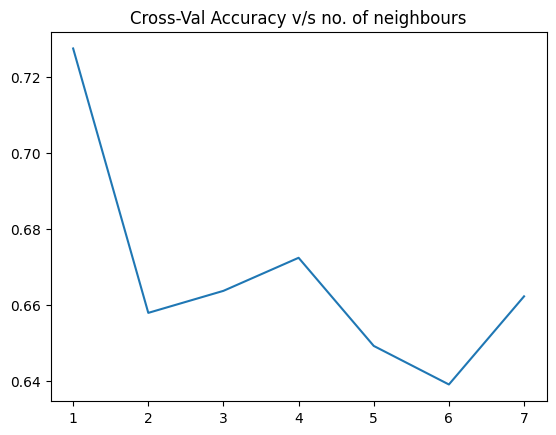

In [258]:
trainX_allSamples = trainDF_User_AllSampleProps.reset_index().drop(columns=['user'])
trainY_allSamples = trainDF_User_AllSampleProps.index

def getCrossValidationAccuracy(n_neighbours):
    knn_allSamples = KNeighborsClassifier(n_neighbours)
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    acc = []
    for train_index, test_index in sss.split(trainX_allSamples, trainY_allSamples):
        knn_allSamples.fit(trainX_allSamples.loc[train_index],trainY_allSamples[train_index])
        acc += [accuracy_score(knn_allSamples.predict(trainX_allSamples.loc[test_index]),trainY_allSamples[test_index])]
    return sum(acc) / len(acc)
allAttemptsAcc = [getCrossValidationAccuracy(i) for i in range(1,8)]
print('Accuracies:',allAttemptsAcc)
sns.lineplot(y=allAttemptsAcc,x=range(1,8)).set_title('Cross-Val Accuracy v/s no. of neighbours')

In [259]:
%%time
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=10,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),  # Use the number of unique classes after encoding
    nthread=4,
    seed=27
)

param_search = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200, 210, 230, 250, 270, 290, 310, 330],
    'max_depth': range(4, 10, 1)
}

gsearch2b = GridSearchCV(
    estimator=xgb1,
    param_grid=param_search,
    scoring='accuracy',
    n_jobs=4,
    cv=StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0),
    verbose=1
)

gsearch2b.fit(trainX_allSamples, trainY_encoded)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

In [ ]:
print('Best Estimator:\n',gsearch2b.best_estimator_)

Best Estimator:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=310, n_jobs=None, nthread=4,
              num_class=86, ...)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
accs = []

for train_index, test_index in sss.split(trainX_allSamples, trainY_encoded):
    gsearch2b.best_estimator_.fit(trainX_allSamples.iloc[train_index], trainY_encoded[train_index])
    predictions = gsearch2b.best_estimator_.predict(trainX_allSamples.iloc[test_index])
    acc = accuracy_score(predictions, trainY_encoded[test_index])
    print('Accuracy Score:', acc)
    accs.append(acc)

print('Average Accuracy:', sum(accs) / len(accs))


Accuracy Score: 0.7101449275362319
Accuracy Score: 0.7681159420289855
Accuracy Score: 0.7753623188405797
Accuracy Score: 0.8043478260869565
Accuracy Score: 0.7463768115942029
Average Accuracy: 0.7608695652173914


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

# Fit the best estimator on the training data
gsearch2b.best_estimator_.fit(trainX_allSamples, trainY_encoded)

# Make predictions on the test data
testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
textPreds_allSamples = gsearch2b.best_estimator_.predict(testX_allSamples)

# Create a DataFrame with 'idx' and 'user' columns and save it to a CSV file
submission_df = pd.DataFrame({'idx': testX_allSamples.index, 'user': textPreds_allSamples})
submission_df.to_csv('submission.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

# Fit the best estimator on the training data
gsearch2b.best_estimator_.fit(trainX_allSamples, trainY_encoded)

# Make predictions on the test data
testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
textPreds_allSamples = gsearch2b.best_estimator_.predict(testX_allSamples)

# Get the actual indices of the test data
actual_indices = testDF_User_AllSampleProps.reset_index().index

# Create a DataFrame with 'idx', 'user', and 'actual_index' columns
submission_df = pd.DataFrame({'idx': testX_allSamples.index, 
                              'user': textPreds_allSamples, 
                              'actual_index': actual_indices})

# Save it to a CSV file
submission_df.to_csv('submission.csv', index=False)


In [ ]:
len(trainDF.columns)

64

In [262]:
print(testDF_UserProps.columns)


Index(['HD_0', 'HD_1', 'HD_2', 'HD_3', 'HD_4', 'HD_5', 'HD_6', 'HD_7', 'HD_8',
       'HD_9', 'HD_10', 'HD_11', 'HD_12', 'PPD_0', 'PPD_1', 'PPD_2', 'PPD_3',
       'PPD_4', 'PPD_5', 'PPD_6', 'PPD_7', 'PPD_8', 'PPD_9', 'PPD_10',
       'PPD_11', 'PPD_12', 'RPD_0', 'RPD_1', 'RPD_2', 'RPD_3', 'RPD_4',
       'RPD_5', 'RPD_6', 'RPD_7', 'RPD_8', 'RPD_9', 'RPD_10', 'RPD_11',
       'RPD_12'],
      dtype='object')


In [266]:
pd.set_option('display.max_rows', None)
# Fit the KNN model on the training data
knn_summary.fit(trainX_summary, trainY_summary)

# Predict using the KNN model on the training data
train_preds = knn_summary.predict(trainX_summary)

# Create a DataFrame to store actual and predicted values
comparison_df = pd.DataFrame({'Actual': trainY_summary, 'Predicted': train_preds})

# Display the first few rows of the DataFrame
print(comparison_df)



    Actual  Predicted
0        2          2
1        3          3
2        4          4
3        5          5
4        6          6
5        7          7
6        8          8
7        9          9
8       10         10
9       11         11
10      12         12
11      13         13
12      14         14
13      15         15
14      16         16
15      17         17
16      18         18
17      19         19
18      20         20
19      21         21
20      22         22
21      23         23
22      24         24
23      25         25
24      26         26
25      27         27
26      28         28
27      29         29
28      30         30
29      31         31
30      32         32
31      33         33
32      34         34
33      35         35
34      36         36
35      37         37
36      38         38
37      39         39
38      40         40
39      41         41
40      42         42
41      43         43
42      44         44
43      45         45
44      46